In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jinma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('tennis_articles_v4.csv')

In [3]:
df

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...
5,6,Nadal has not played tennis since he was force...,https://www.express.co.uk/sport/tennis/1037119...
6,7,"Tennis giveth, and tennis taketh away. The end...",http://www.tennis.com/pro-game/2018/10/tennisc...
7,8,Federer won the Swiss Indoors last week by bea...,https://www.express.co.uk/sport/tennis/1038186...


In [4]:
# split the text in the articles into sentences
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

In [5]:
sentences[0]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at all.

In [6]:
# flatten the list
sentences = [i for s in sentences for i in s]

In [7]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace('[^a-zA-Z]', ' ')

# make alphabets Lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jinma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = ' '.join([i for i in sen if i not in stop_words])
    return sen_new

In [11]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [ ]:
!wget --no-check-certificate "http://nlp.stanford.edu/data/glove.6B.zip"

In [13]:
# Extract word vectors
word_embeddings = {}
f = open('./glove.6B/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [27]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100, )))
                 for w in i.split()]) / (len(i.split()) + 1e-3)
    else:
        v = np.zeros((100, ))
    sentence_vectors.append(v)

In [28]:
len(sentence_vectors)

119

The next step is to find similarities among the sentences.
We will use cosine similarity to find similarity between a pair of sentences.
Let's create an empty similarity matrix for this task and populate it with cosine similarities of the sentences

In [29]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(
                sentence_vectors[i].reshape(1, 100),
                sentence_vectors[j].reshape(1, 100)
            )[0][0]

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

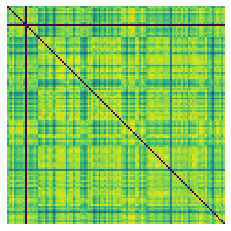

In [38]:
plt.imshow(sim_mat); plt.axis(False); plt.show()

In [39]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [43]:
ranked_sentences = sorted(
    [(scores[i], s) for i, s in enumerate(sentences)], 
    reverse=True)

In [45]:
# Specify number of sentences to from the summary
sn = 10

# Generate summary
for i in range(sn):
    print(ranked_sentences[i][1])

When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
"I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments.
Currently in ninth place, Nishikori with a win could move to within 125 points of the cut for the eight-man event in London 

In [48]:
df['article_text']

0    Maria Sharapova has basically no friends as te...
1    BASEL, Switzerland (AP), Roger Federer advance...
2    Roger Federer has revealed that organisers of ...
3    Kei Nishikori will try to end his long losing ...
4    Federer, 37, first broke through on tour over ...
5    Nadal has not played tennis since he was force...
6    Tennis giveth, and tennis taketh away. The end...
7    Federer won the Swiss Indoors last week by bea...
Name: article_text, dtype: object

# What is PageRank?
- The Anatomy of a Large-Scale Hypertextual Web Search Engine

# What is TextRank?
- TextRank: Bringing Order into Texts
- https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
- Keyword Extraction / Text Summarization